In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def scatter(data, c=None):
    plt.scatter(data[:, 0], data[:, 1], c=c)
    
def plot():
    global W
    global X

    scatter(X)
    scatter(W, "red")
    
def pick(X):
    return X[np.random.choice(X.shape[0]), :].reshape(1, -1)

In [4]:
X = np.random.randn(100, 2)
W = np.random.rand(20, 2)

iters = 2000
alpha = 1e-3
epsilon = 1e-6

Ws = []

for i in range(iters):
    picked = pick(X)

    distances = np.linalg.norm(W - picked, ord=2, axis=1)
    idx = np.argmin(distances)
    closest = W[idx, :]
    distance_scale = np.linalg.norm(W - closest, ord=2, axis=1)

    W = W + alpha * (closest - W) / (np.exp(distance_scale)).reshape(-1, 1)

    Ws.append(W)

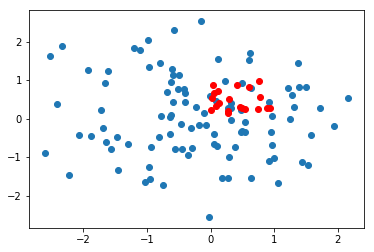

In [5]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(111)
d = np.random.rand(20, 2)

FRAMES = 200
indexes = np.linspace(1, len(Ws), FRAMES).astype(np.int) - 1

def make_frame(i):
    global X, W, indexes
    ax.clear()
    scatter(X)
    scatter(Ws[indexes[i]], "red")

myanim = animation.FuncAnimation(fig, make_frame, frames=FRAMES, interval=50)
HTML(myanim.to_html5_video())

In [138]:
%debug

> <ipython-input-137-f087ecc9224c>(15)make_frame()
     13     ax.clear()
     14     scatter(X)
---> 15     scatter(Ws[indexes[i]], "red")
     16 
     17 myanim = animation.FuncAnimation(fig, make_frame, frames=FRAMES, interval=10)

ipdb> indexes[i]
200000
ipdb> i
98
ipdb> indexes
array([     1,   2041,   4082,   6123,   8164,  10205,  12245,  14286,
        16327,  18368,  20409,  22449,  24490,  26531,  28572,  30613,
        32653,  34694,  36735,  38776,  40817,  42857,  44898,  46939,
        48980,  51021,  53061,  55102,  57143,  59184,  61225,  63265,
        65306,  67347,  69388,  71429,  73470,  75510,  77551,  79592,
        81633,  83674,  85714,  87755,  89796,  91837,  93878,  95918,
        97959, 100000, 102041, 104082, 106122, 108163, 110204, 112245,
       114286, 116326, 118367, 120408, 122449, 124490, 126530, 128571,
       130612, 132653, 134694, 136735, 138775, 140816, 142857, 144898,
       146939, 148979, 151020, 153061, 155102, 157143, 159183, 161224,
     

array([     1,   2021,   4041,   6061,   8081,  10101,  12122,  14142,
        16162,  18182,  20202,  22223,  24243,  26263,  28283,  30303,
        32324,  34344,  36364,  38384,  40404,  42425,  44445,  46465,
        48485,  50505,  52525,  54546,  56566,  58586,  60606,  62626,
        64647,  66667,  68687,  70707,  72727,  74748,  76768,  78788,
        80808,  82828,  84849,  86869,  88889,  90909,  92929,  94950,
        96970,  98990, 101010, 103030, 105050, 107071, 109091, 111111,
       113131, 115151, 117172, 119192, 121212, 123232, 125252, 127273,
       129293, 131313, 133333, 135353, 137374, 139394, 141414, 143434,
       145454, 147475, 149495, 151515, 153535, 155555, 157575, 159596,
       161616, 163636, 165656, 167676, 169697, 171717, 173737, 175757,
       177777, 179798, 181818, 183838, 185858, 187878, 189899, 191919,
       193939, 195959, 197979, 200000])